# 📊 Trabajando con Dataset "Titanic"

#### Dataset Titanic
El dataset del Titanic, es un conjunto de datos clásico utilizado para tareas de clasificación binaria. Se basa en información histórica de los pasajeros del RMS Titanic, que se hundió en 1912 tras chocar con un iceberg. El objetivo principal es predecir si un pasajero sobrevivió o no, basado en características como su clase social, edad, género y otros factores socioeconómicos.

El RMS Titanic se hundió el 15 de abril de 1912 durante su viaje inaugural. De las aproximadamente 2,224 personas a bordo, más de 1,500 murieron, convirtiendo este evento en uno de los naufragios más mortíferos en tiempos de paz.


## 💾 Carga del Dataset

In [8]:
import pandas as pd

# Cargar el dataset
url = "https://raw.githubusercontent.com/aap-unlp/datasets/main/titanic/titanic.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas para verificar
print("Primeras filas del dataset:")
display(df.head())

# 1. Mostrar atributos con valores faltantes
print("\nValores faltantes por columna:")
display(df.isnull().sum())
print("\nPorcentaje de valores faltantes por columna:")
nulls = pd.DataFrame({
    "nulos": df.isnull().sum(),
    "porcentaje": df.isnull().mean() * 100
})
display(nulls)

print("Valores estadisticos:")
display(df.describe(include='all'))


Primeras filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Valores faltantes por columna:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Porcentaje de valores faltantes por columna:


,nulos,porcentaje
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


Valores estadisticos:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 📋 Creacion de Atributo "Title"

Se busca extraer en una columna los titulos de los textos que contienen los nombres. Estos están en todos los nombres:
* "Doe, Mr. John" => "Mr"
* "Smith, Mrs. Mary" => "Mrs"
* "Johnson, Dr. Robert" => "Dr"

### Uso de expresiones regulares para extraer texto
Desglose de la expresión **r', ([^\.]+)\.'**:

   * r' : Indica que es una cadena "raw" (cruda) para evitar problemas con caracteres especiales
   * ,  : Busca una coma y espacio literal debe estar en el texto obligatoriamente

  * ([^\.]+) - Grupo de captura (lo que se extraerá):

        * [^\.] - Cualquier carácter que NO sea un punto (después de la coma y espacio)

        * \+ : Una o más ocurrencias del patrón anterior (todos los caracteres)

  * \. : Un punto literal (el que cierra el título)

In [9]:
df['Title'] = df['Name'].str.extract(r', ([^\.]+)\.', expand=False)

display(df['Title'])

# Mostrar resultados
print("Títulos extraídos:")
print(df['Title'].value_counts())

# Mostrar algunas filas para verificar
print("\nPrimeras filas con el nuevo campo:")
print(df[['Name', 'Title']].head(10))


# Verificar cuántos NO tienen título (son NaN)
missing_titles = df['Title'].isnull().sum()
print(f"\nNúmero de filas sin título: {missing_titles}")


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

Títulos extraídos:
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

Primeras filas con el nuevo campo:
                                                Name   Title
0                            Braund, Mr. Owen Harris      Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                             Heikkinen, Miss. Laina    Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                           Allen, Mr. William Henry      Mr
5                                   Moran, Mr. James      Mr
6                            McCarthy, Mr. Timothy J      Mr
7                     Palsson, Master. Gosta Leonard  Master
8  Johnson, Mrs. Oscar W

### 🌐 Unificación en 5 Titulos


In [10]:
# Unificar los obvios
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})

# Agrupar todos los títulos poco frecuentes en 'Other'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Lady', 'Countess',
               'the Countess', 'Don', 'Dona', 'Jonkheer']

df['Title'] = df['Title'].replace(rare_titles, 'Other')

display(df['Title'].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64

### 🧩 Imputar Edad
Como el atributo edad tiene muchos valores faltantes es posible utilizar el titulo para asignar una edad promedio por grupo (es mejor que un promedio general)

In [11]:
# Verificar valores faltantes antes y después
print("Valores faltantes en 'Age' ANTES de imputar:", df['Age'].isnull().sum())


# Imputar edad por promedio del grupo
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))


# Verificar después
print("Valores faltantes en 'Age' DESPUÉS de imputar:", df['Age'].isnull().sum())

Valores faltantes en 'Age' ANTES de imputar: 177
Valores faltantes en 'Age' DESPUÉS de imputar: 0


### 📊 Visualización de Edad (Antes vs Después)

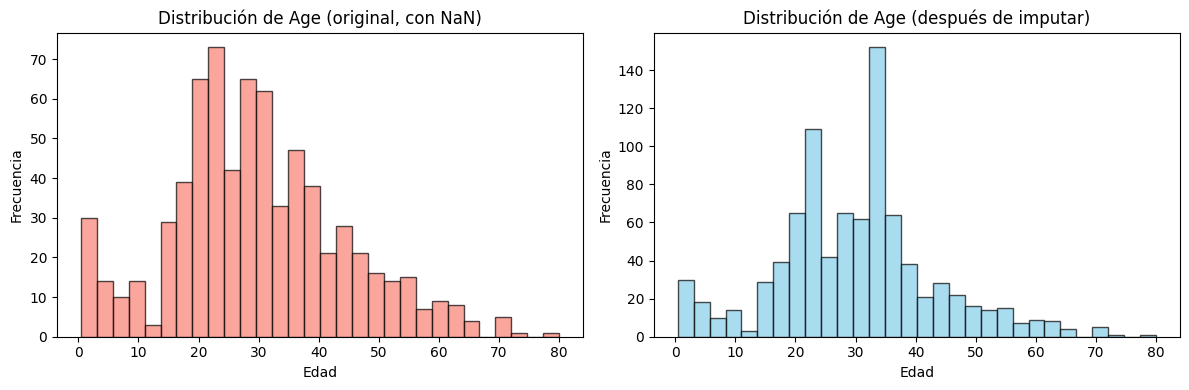

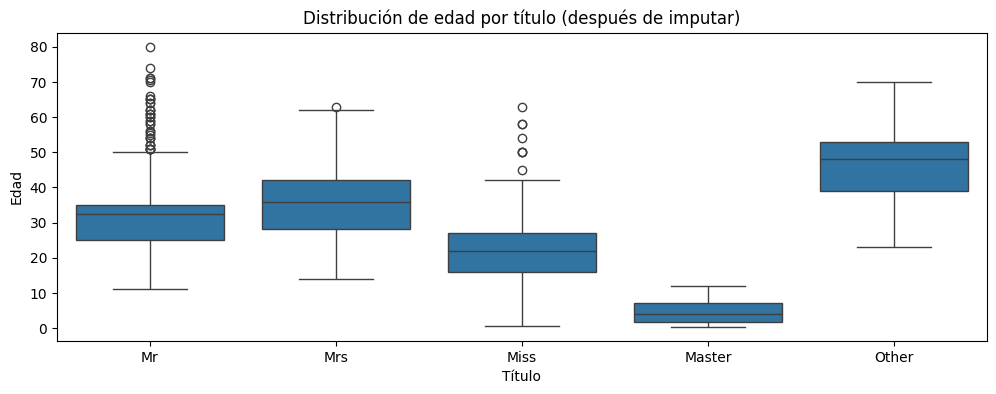

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear copia temporal con Age original (para comparar)
url = "https://raw.githubusercontent.com/aap-unlp/datasets/main/titanic/titanic.csv"
df_original = pd.read_csv(url)

age_original = df_original['Age']

# Comparar
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Antes
ax[0].hist(age_original, bins=30, color='salmon', edgecolor='black', alpha=0.7)
ax[0].set_title('Distribución de Age (original, con NaN)')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Frecuencia')

# Después
ax[1].hist(df['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax[1].set_title('Distribución de Age (después de imputar)')
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='Title', y='Age')
plt.title('Distribución de edad por título (después de imputar)')
plt.ylabel('Edad')
plt.xlabel('Título')
plt.show()



## 🧩 Creación de Atributos adicionales
En algunos casos es conveniente generar atributos que expliquen mejor los datos. Aquí se crea "FamilySize" que agrupa información de cantidad de hermanos y padres/hijos, también se crea "IsAlone" para indicar si la persona esta sola en el viaje.

In [13]:
# Numerización de variable categorica "Sex"
df['Sex'] = df['Sex'] == 'male'

# Crear FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Crear IsAlone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Verificar
display(df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head(8))


,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1
5,0,0,1,1
6,0,0,1,1
7,3,1,5,0


#### 🔢 Matriz de correlación de Atributos

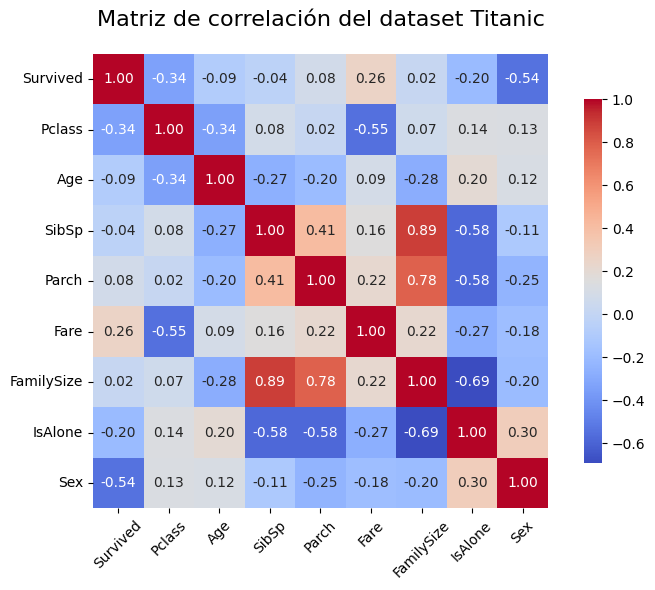

-0.5494996199439074


In [14]:
# Usamos solo columnas numéricas
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex']
df_numeric = df[numeric_cols].copy()

# --- Matriz de correlación ---
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": 0.8})
plt.title('Matriz de correlación del dataset Titanic', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

corr = df['Fare'].corr(df['Pclass'])
print(corr)

## 📊 Alguna Visualizaciones

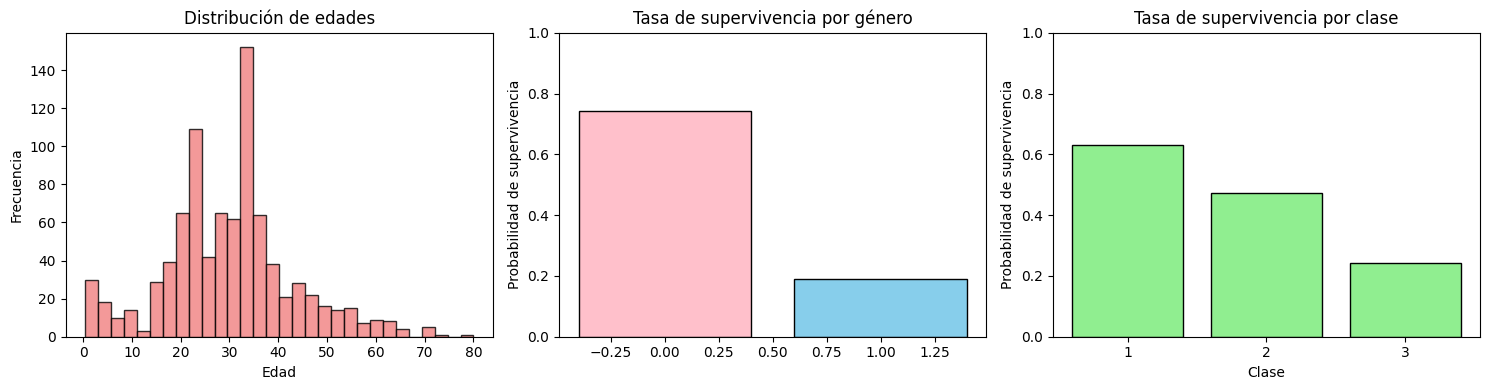

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Histograma de Age
ax[0].hist(df['Age'].dropna(), bins=30, color='lightcoral', edgecolor='black', alpha=0.8)
ax[0].set_title('Distribución de edades')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Frecuencia')

# Survived por Sex
sex_surv = df.groupby('Sex')['Survived'].mean()
ax[1].bar(sex_surv.index, sex_surv.values, color=['pink', 'skyblue'], edgecolor='black')
ax[1].set_title('Tasa de supervivencia por género')
ax[1].set_ylabel('Probabilidad de supervivencia')
ax[1].set_ylim(0, 1)

# Survived por Pclass
pclass_surv = df.groupby('Pclass')['Survived'].mean()
ax[2].bar(pclass_surv.index, pclass_surv.values, color='lightgreen', edgecolor='black')
ax[2].set_title('Tasa de supervivencia por clase')
ax[2].set_ylabel('Probabilidad de supervivencia')
ax[2].set_xlabel('Clase')
ax[2].set_xticks([1, 2, 3])
ax[2].set_ylim(0, 1)


plt.tight_layout()
plt.show()

Antes de Normalizar


,Altura,Peso
0,1.65,75
1,1.81,86
2,1.70,82
3,1.62,78
4,1.74,77
5,1.70,87
6,1.80,90
7,1.73,83
8,1.68,80


,Altura,Peso
count,9.000000,9.0
mean,1.714444,82.0
std,0.063268,5.0
min,1.620000,75.0
25%,1.680000,78.0
50%,1.700000,82.0
75%,1.740000,86.0
max,1.810000,90.0


Normalizacion Min-Max


,Altura,Peso
0,0.157895,0.000000
1,1.000000,0.733333
2,0.421053,0.466667
3,0.000000,0.200000
4,0.631579,0.133333
5,0.421053,0.800000
6,0.947368,1.000000
7,0.578947,0.533333
8,0.315789,0.333333


Normalizacion Estandar


,Altura,Peso
0,-1.018603,-1.4
1,1.510342,0.8
2,-0.228307,0.0
3,-1.492780,-0.8
4,0.403929,-1.0
5,-0.228307,1.0
6,1.352283,1.6
7,0.245870,0.2
8,-0.544425,-0.4


Normalizacion Robusta


,Altura,Peso
0,-0.833333,-0.875
1,1.833333,0.500
2,0.000000,0.000
3,-1.333333,-0.500
4,0.666667,-0.625
5,0.000000,0.625
6,1.666667,1.000
7,0.500000,0.125
8,-0.333333,-0.250


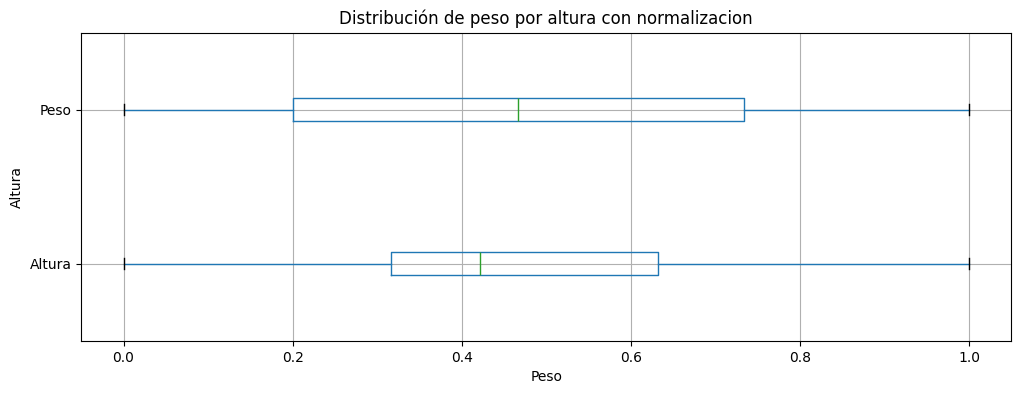

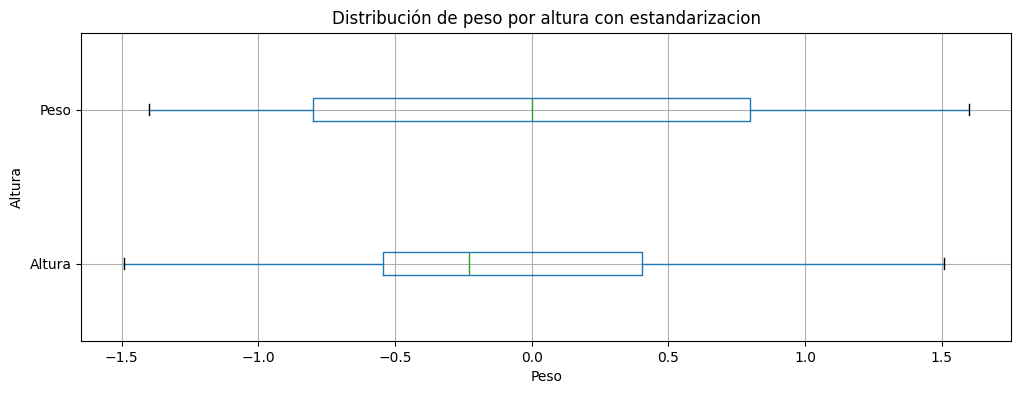

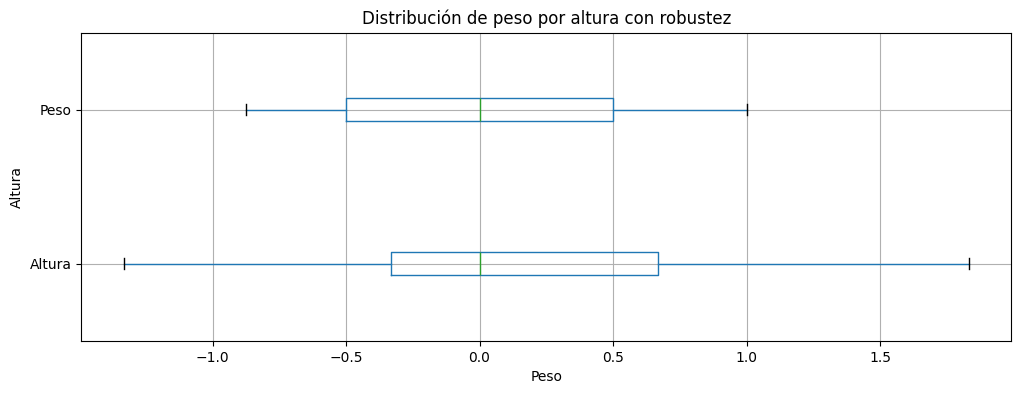

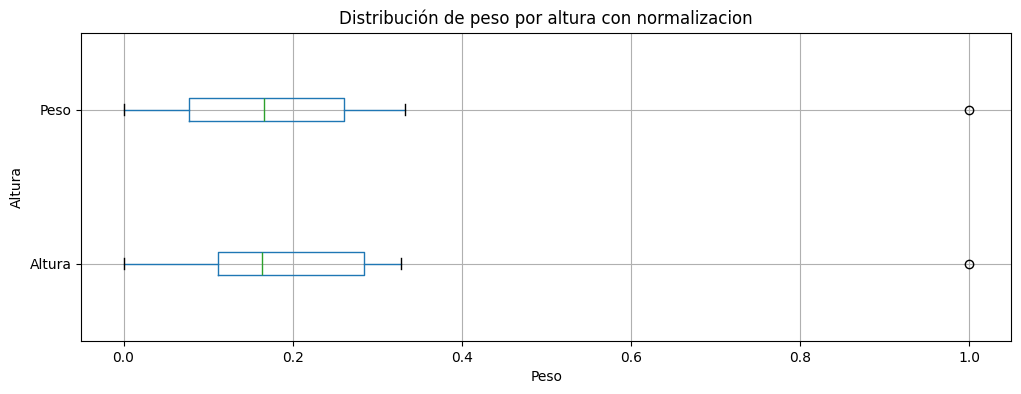

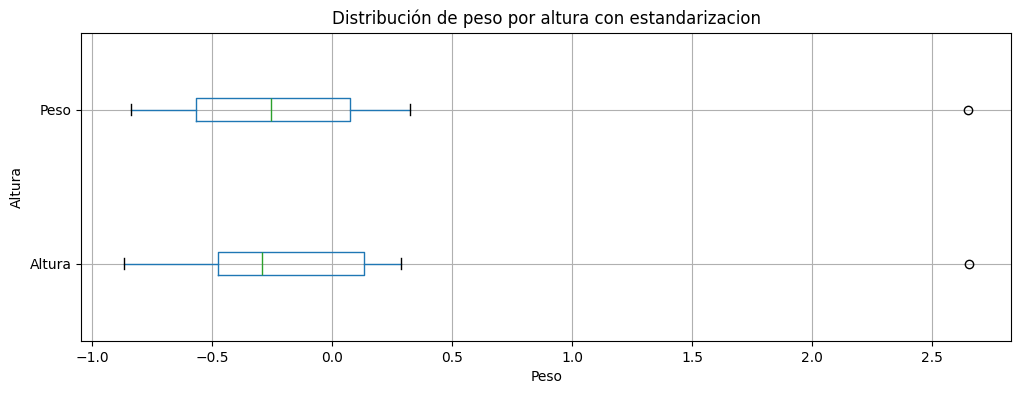

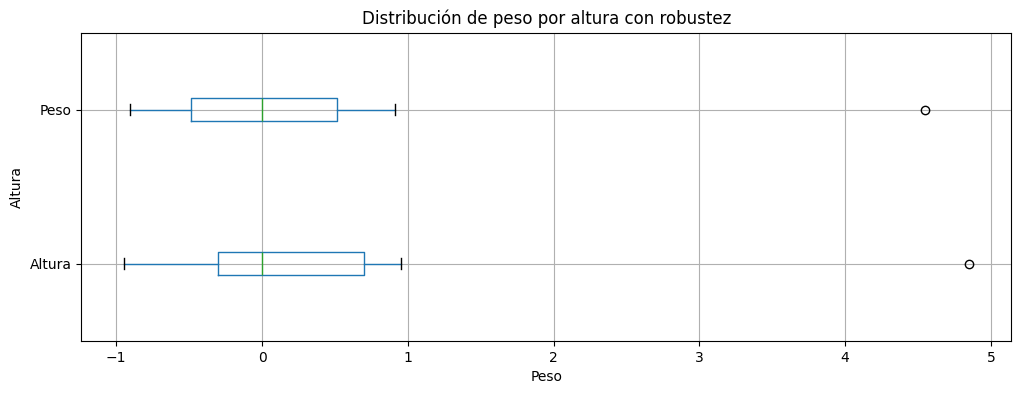

In [31]:

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# PARTE A
alturas = [1.65, 1.81, 1.70, 1.62, 1.74, 1.70, 1.80, 1.73, 1.68]
pesos   = [75, 86, 82, 78, 77, 87, 90, 83, 80]
df = pd.DataFrame({
    "Altura": alturas,
    "Peso": pesos
})
df_norm = (df - df.min()) / (df.max() - df.min())
df_std = (df - df.mean()) / df.std()
df_robust = (df - df.median()) / (df.quantile(0.75) - df.quantile(0.25))


#
print("Antes de Normalizar")
display(df)
display(df.describe(include='all'))
# NORMALIZACIONES
print("Normalizacion Min-Max")
display(df_norm)
print("Normalizacion Estandar")
display(df_std)
print("Normalizacion Robusta")
display(df_robust)

# Min-Max
plt.figure(figsize=(12, 4))
df_norm.boxplot(vert=False)
plt.title('Distribución de peso por altura con normalizacion')
plt.ylabel('Altura')
plt.xlabel('Peso')
plt.show()
# Standard
plt.figure(figsize=(12, 4))
df_std.boxplot(vert=False)
plt.title('Distribución de peso por altura con estandarizacion')
plt.ylabel('Altura')
plt.xlabel('Peso')
plt.show()
# Min-Max Robust
plt.figure(figsize=(12, 4))
df_robust.boxplot(vert=False)
plt.title('Distribución de peso por altura con robustez')
plt.ylabel('Altura')
plt.xlabel('Peso')
plt.show()


# PARTE B
alturas.append(2.20)
pesos.append(120)
df = pd.DataFrame({
    "Altura": alturas,
    "Peso": pesos
})
df_norm = (df - df.min()) / (df.max() - df.min())
df_std = (df - df.mean()) / df.std()
df_robust = (df - df.median()) / (df.quantile(0.75) - df.quantile(0.25))

# Min-Max
plt.figure(figsize=(12, 4))
df_norm.boxplot(vert=False)
plt.title('Distribución de peso por altura con normalizacion')
plt.ylabel('Altura')
plt.xlabel('Peso')
plt.show()

# Standard
plt.figure(figsize=(12, 4))
df_std.boxplot(vert=False)
plt.title('Distribución de peso por altura con estandarizacion')
plt.ylabel('Altura')
plt.xlabel('Peso')
plt.show()

# Min-Max Robust
plt.figure(figsize=(12, 4))
df_robust.boxplot(vert=False)
plt.title('Distribución de peso por altura con robustez')
plt.ylabel('Altura')
plt.xlabel('Peso')
plt.show()


